Before:


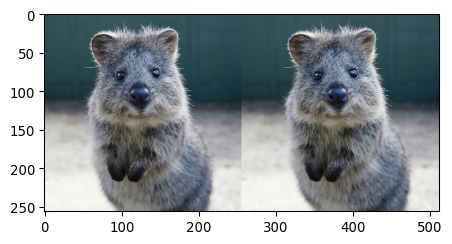

After:


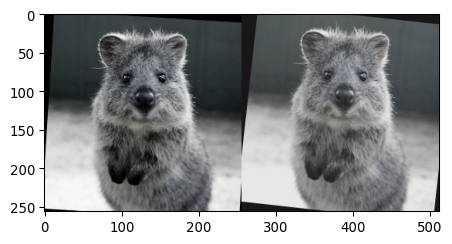

In [1]:
import numpy as np
import imgaug as ia
from imgaug import augmenters as iaa
%matplotlib inline

ia.seed(3)

class AugSequence:
    def __init__(self):
        # instantiate each augmenter and save it to its own variable
        self.affine = iaa.Affine(rotate=(-20, 20), translate_px={"x": (-10, 10), "y": (-5, 5)})
        self.multiply = iaa.Multiply((0.9, 1.1))
        self.contrast = iaa.LinearContrast((0.8, 1.2))
        self.gray = iaa.Grayscale((0.0, 1.0))

    def augment_images(self, x):
        # apply each augmenter on its own, one by one
        x = self.affine(images=x)
        x = self.multiply(images=x)
        x = self.contrast(images=x)
        x = self.gray(images=x)
        return x

aug = AugSequence()

image = ia.quokka_square(size=(256, 256))  # uint8 array of shape (256, 256, 3)
images_aug = aug.augment_images([image, image])

print("Before:")
ia.imshow(np.hstack([image, image]))
print("After:")
ia.imshow(np.hstack(images_aug))

In [5]:
import sys
print (sys.version)

3.11.4 (main, Jul  5 2023, 08:54:11) [Clang 14.0.6 ]
